In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv("train_wn75k28.csv")

In [3]:
test=pd.read_csv("test_Wf7sxXF.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [6]:
train.shape

(39161, 19)

In [7]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [8]:
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(id                          0
 created_at                  0
 campaign_var_1              0
 campaign_var_2              0
 products_purchased      20911
 signup_date             15113
 user_activity_var_1         0
 user_activity_var_2         0
 user_activity_var_3         0
 user_activity_var_4         0
 user_activity_var_5         0
 user_activity_var_6         0
 user_activity_var_7         0
 user_activity_var_8         0
 user_activity_var_9         0
 user_activity_var_10        0
 user_activity_var_11        0
 user_activity_var_12        0
 buy                         0
 dtype: int64,
 id                         0
 created_at                 0
 campaign_var_1             0
 campaign_var_2             0
 products_purchased      8136
 signup_date             6649
 user_activity_var_1        0
 user_activity_var_2        0
 user_activity_var_3        0
 user_activity_var_4        0
 user_activity_var_5        0
 user_activity_var_6        0
 user_activity_var_7        0
 user_

In [10]:
train['products_purchased']=train['products_purchased'].fillna(method='bfill')
train['signup_date']=train['signup_date'].fillna(method='bfill')

In [11]:
test['products_purchased']=test['products_purchased'].fillna(method='bfill')
test['signup_date']=test['signup_date'].fillna(method='bfill')

In [12]:
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,3.0,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,2.0,2020-06-22,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,3.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [14]:
k=['created_at']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])

for i in k:
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'dayofweek'] = train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)

train.nunique(),test.nunique()

(id                       39161
 created_at                 365
 campaign_var_1              16
 campaign_var_2              15
 products_purchased           4
 signup_date               1800
 user_activity_var_1          4
 user_activity_var_2          2
 user_activity_var_3          2
 user_activity_var_4          2
 user_activity_var_5          3
 user_activity_var_6          4
 user_activity_var_7          3
 user_activity_var_8          3
 user_activity_var_9          2
 user_activity_var_10         2
 user_activity_var_11         5
 user_activity_var_12         2
 buy                          2
 created_at_day              31
 created_at_weekofyear       53
 created_at_month            12
 created_at_dayofweek         7
 created_at_weekend           2
 dtype: int64,
 id                       13184
 created_at                  89
 campaign_var_1              16
 campaign_var_2              15
 products_purchased           4
 signup_date               1257
 user_activity_var_1     

In [15]:
del train['created_at']
del test['created_at']

In [16]:
k=['signup_date']
for i in k:
  train[i] = pd.to_datetime(train[i])
  test[i] = pd.to_datetime(test[i])

for i in k:
  test[i+'_'+'day'] = test[i].dt.day
  test[i+'_'+'weekofyear'] = test[i].dt.weekofyear
  test[i+'_'+'month'] = test[i].dt.month
  test[i+'_'+'dayofweek'] =test[i].dt.dayofweek
  test[i+'_'+'weekend'] = (test[i].dt.weekday >=5).astype(int)
  train[i+'_'+'day'] = train[i].dt.day
  train[i+'_'+'weekofyear'] = train[i].dt.weekofyear
  train[i+'_'+'month'] = train[i].dt.month
  train[i+'_'+'dayofweek'] = train[i].dt.dayofweek
  train[i+'_'+'weekend'] = (train[i].dt.weekday >=5).astype(int)

train.nunique(),test.nunique()


(id                        39161
 campaign_var_1               16
 campaign_var_2               15
 products_purchased            4
 signup_date                1800
 user_activity_var_1           4
 user_activity_var_2           2
 user_activity_var_3           2
 user_activity_var_4           2
 user_activity_var_5           3
 user_activity_var_6           4
 user_activity_var_7           3
 user_activity_var_8           3
 user_activity_var_9           2
 user_activity_var_10          2
 user_activity_var_11          5
 user_activity_var_12          2
 buy                           2
 created_at_day               31
 created_at_weekofyear        53
 created_at_month             12
 created_at_dayofweek          7
 created_at_weekend            2
 signup_date_day              31
 signup_date_weekofyear       53
 signup_date_month            12
 signup_date_dayofweek         7
 signup_date_weekend           2
 dtype: int64,
 id                        13184
 campaign_var_1             

In [17]:
del train['signup_date']
del test['signup_date']

In [18]:
train.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,created_at_day,created_at_weekofyear,created_at_month,created_at_dayofweek,created_at_weekend,signup_date_day,signup_date_weekofyear,signup_date_month,signup_date_dayofweek,signup_date_weekend
0,1,1,2,2.0,0,0,0,0,0,0,...,1,53,1,4,0,24,39,9,3,0
1,2,2,1,2.0,1,0,1,0,0,0,...,1,53,1,4,0,19,38,9,5,1
2,3,9,3,3.0,1,0,0,0,0,0,...,1,53,1,4,0,11,32,8,2,0
3,4,6,7,2.0,0,0,0,0,0,0,...,1,53,1,4,0,4,40,10,2,0
4,5,4,6,3.0,0,0,0,0,0,0,...,1,53,1,4,0,8,24,6,0,0


In [19]:
test.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,created_at_day,created_at_weekofyear,created_at_month,created_at_dayofweek,created_at_weekend,signup_date_day,signup_date_weekofyear,signup_date_month,signup_date_dayofweek,signup_date_weekend
0,39162,2,2,3.0,1,1,0,0,0,1,...,1,52,1,5,1,17.0,33.0,8.0,1.0,0
1,39163,4,7,3.0,1,0,0,0,0,0,...,1,52,1,5,1,21.0,21.0,5.0,3.0,0
2,39164,8,7,2.0,0,0,0,0,1,1,...,1,52,1,5,1,22.0,26.0,6.0,0.0,0
3,39165,9,8,2.0,0,0,0,0,1,1,...,1,52,1,5,1,22.0,26.0,6.0,0.0,0
4,39166,4,5,2.0,1,0,0,0,0,0,...,1,52,1,5,1,10.0,10.0,3.0,2.0,0


In [20]:
#Filling null values

In [21]:
train_df=train
test_df=test

In [22]:
train_df['products_purchased'].fillna(int(train_df['products_purchased'].mode()), inplace=True)


In [23]:
test_df['products_purchased'].fillna(int(test_df['products_purchased'].mode()), inplace=True)


In [24]:
test_df['signup_date_day'].fillna(int(test_df['signup_date_day'].mode()), inplace=True)
test_df['signup_date_weekofyear'].fillna(int(test_df['signup_date_weekofyear'].mode()), inplace=True)
test_df['signup_date_month'].fillna(int(test_df['signup_date_month'].mode()), inplace=True)
test_df['signup_date_dayofweek'].fillna(int(test_df['signup_date_dayofweek'].mode()), inplace=True)

In [25]:
train_df['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [26]:
train_df['buy'].value_counts(normalize=True)

0    0.94898
1    0.05102
Name: buy, dtype: float64

In [27]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Identifying the target variable
X = train_df.drop('buy',axis=1)
y = train_df['buy']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Building the Model - RandomForestClassifier

In [28]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
model_rf = RandomForestClassifier()

# Fit the random forest model
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
predictions = model_rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.9748063664992765

********** Conf Matrix **********
[[11117    18]
 [  278   336]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11135
           1       0.95      0.55      0.69       614

    accuracy                           0.97     11749
   macro avg       0.96      0.77      0.84     11749
weighted avg       0.97      0.97      0.97     11749




# Hyperparameter for Random Forest
# Tuning max_depth

In [31]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 20, 5)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [32]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 17}
RandomForestClassifier(max_depth=17)

Score on Test Data:  0.9750617073793514


In [33]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.483766,0.013003,0.029122,0.007864,2,{'max_depth': 2},0.954222,0.954405,0.954031,0.955126,...,0.954509,0.000391,4,0.954261,0.954946,0.954309,0.955495,0.954628,0.954728,0.000456
1,1.137014,0.050275,0.038326,0.004064,7,{'max_depth': 7},0.974467,0.972643,0.974097,0.973732,...,0.973807,0.000627,3,0.975056,0.975421,0.975376,0.975194,0.975376,0.975285,0.000138
2,1.527567,0.020353,0.054706,0.006986,12,{'max_depth': 12},0.974831,0.973190,0.974097,0.974097,...,0.974099,0.000528,2,0.976105,0.976834,0.976653,0.976471,0.976288,0.976470,0.000258
3,1.882019,0.021003,0.074831,0.005315,17,{'max_depth': 17},0.974831,0.973372,0.974097,0.974462,...,0.974281,0.000515,1,0.980482,0.981942,0.981760,0.980666,0.980575,0.981085,0.000631


# Fitting the final RandomForestClassifier model with tunned hyperparameter

In [34]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=12,
                                  n_estimators=200)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200)

In [35]:
predictions = model_rf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*10, 'Accuracy', '*'*10)
print(accuracy_score(y_test,predictions))
print()

print('*'*10, 'Conf Matrix', '*'*10)
print(confusion_matrix(y_test,predictions))
print()

print('*'*10, 'Class Report', '*'*10)
print(classification_report(y_test,predictions))
print()

********** Accuracy **********
0.9750617073793514

********** Conf Matrix **********
[[11119    16]
 [  277   337]]

********** Class Report **********
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11135
           1       0.95      0.55      0.70       614

    accuracy                           0.98     11749
   macro avg       0.97      0.77      0.84     11749
weighted avg       0.97      0.98      0.97     11749




In [37]:
# Feature Importance with RandomForest

In [38]:
model_rf.feature_importances_

array([0.01734391, 0.01278826, 0.01290077, 0.00591759, 0.00953089,
       0.15538836, 0.00187867, 0.197544  , 0.03037086, 0.00415711,
       0.00243009, 0.00943883, 0.27870431, 0.00523316, 0.17956491,
       0.00491952, 0.01058023, 0.00941467, 0.00588565, 0.00593602,
       0.00137088, 0.01165317, 0.01170534, 0.0072014 , 0.00642692,
       0.00171446])

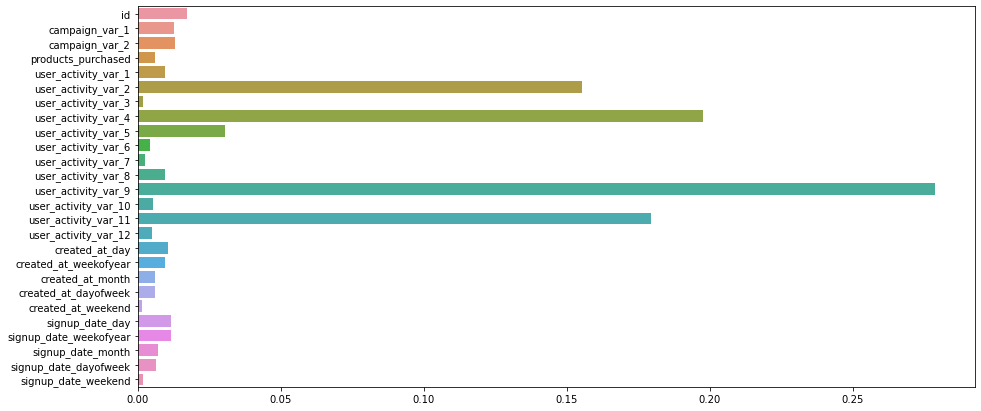

In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns )
plt.show();

In [40]:
final=model_rf.predict(test_df)

In [41]:
submission = pd.DataFrame({
        "id": test_df['id'],
        "buy":final
    })

In [42]:
submission.to_csv('submission.csv', index=False)
print(submission)

          id  buy
0      39162    1
1      39163    0
2      39164    0
3      39165    1
4      39166    0
...      ...  ...
13179  52341    0
13180  52342    0
13181  52343    0
13182  52344    0
13183  52345    0

[13184 rows x 2 columns]


# <Center><b>Thank you</b></Center>